In [43]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt

/Users/ttn/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Idea
 - `Association` is not `Causation`.
     - It is not necessary that explanatory variable always results in production of response variable. Explainatory variable may be associated in the process of production of response variable, but it is not necessary that it has caused the production of response variable.
     - So, who else is contributing toward production of response variable. Answer is `lurking variable`. It is something we have not taken into account, but it holds significant importance in production process.
     - How does it impact the production process? Answer is, `lurking variable` may have impact on either explainatory variable or/and response variable.


In [42]:
df = pd.read_excel('./body_image.xls')
df.head(1)

,Gender,Height,GPA,HS GPA,Seat,WtFeel,Cheat
0,Female,64.0,2.6,2.63,M,AboutRt,No


In [9]:
first_10 = df.head(10)
first_10.groupby('Seat').size()

Seat
B    2
F    4
M    4
dtype: int64

In [11]:
first_10[first_10['GPA'] > first_10['HS GPA']]

,Gender,Height,GPA,HS GPA,Seat,WtFeel,Cheat
3,Female,63.0,3.11,2.73,F,AboutRt,No
4,Male,72.0,3.4,2.35,B,OverWt,No
8,Male,72.0,3.77,3.09,M,UnderWt,No


In [14]:
first_10.sort_values('GPA', ascending=False).head(1)

,Gender,Height,GPA,HS GPA,Seat,WtFeel,Cheat
8,Male,72.0,3.77,3.09,M,UnderWt,No


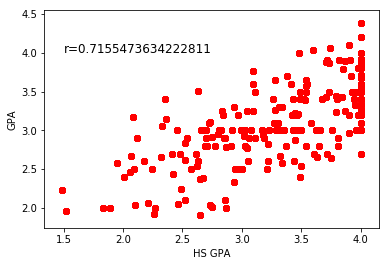

In [41]:
# Q1. Is there a relationship between students' college GPAs and their high school GPAs?
valid_gpas = df[(df['GPA'] != '*') & (df['HS GPA'] != '*')]
r = np.corrcoef(x_hs_gpa, y_gpa)[0][1]

plt.scatter(valid_gpas['HS GPA'], valid_gpas['GPA'], color='red')
plt.text(1.5, 4.0, 'r={}'.format(r), fontsize=12)
plt.ylabel('GPA')
plt.xlabel('HS GPA')
plt.show()

x_hs_gpa = valid_gpas['HS GPA'].apply(lambda x: float(x))
y_gpa = valid_gpas['GPA'].apply(lambda x: float(x))


 - Relationship seems to be postive, linear, strong. Correlation is strong as well.
 - This suggest HS GPA is related to GPA.

In [48]:
np.array(valid_gpas['HS GPA'])
np.array(valid_gpas['GPA'])

array([2.6, 2.7, 3, 3.11, 3.4, 3.43, 3.7, 3.7, 3.77, 3.5, 3, 3, 3.5, 3.25,
       2.83, 2.62, 3.15, 4.2, 3.7, 4.38, 3.65, 3.6, 3, 2.25, 4.03, 2.54,
       2.6, 3, 2.93, 3.2, 3, 3.4, 2.5, 3, 3.51, 2.37, 3.5, 3, 2.9, 3.9,
       2.65, 3.5, 3.3, 3.4, 3.6, 3.21, 3.1, 3.85, 3.2, 2.5, 2.5, 2.9, 4.2,
       2.8, 2.6, 3.05, 3.7, 4, 3.5, 3.22, 2.9, 3.25, 3.26, 3, 2.01, 3.71,
       3.87, 3.26, 2.5, 2.9, 3.6, 3.9, 2, 3.2, 3.3, 2.8, 3.8, 3, 2.23,
       3.876, 3.01, 2.5, 3, 2.79, 3.8, 3.25, 2.8, 3.39, 2.64, 3.65, 3.4,
       3.33, 3.9, 2.54, 2.8, 3.5, 3.1, 2.66, 1.91, 2.8, 2.8, 2.7, 3.8,
       3.24, 2.58, 3.17, 2.6, 2.58, 2, 3.44, 2.9, 2.7, 3.5, 3, 2.44, 2,
       3.34, 3.83, 1.92, 2.7, 3.9, 2.33, 1.96, 3, 3, 3.4, 2.05, 3.1, 3, 3,
       3.25, 3.92, 4, 3, 3.26, 2.8, 2.84, 2.8, 2.87, 2.1, 2.77, 2.95, 3.7,
       3.89, 3.5, 3, 3.88, 3, 4, 3.2, 3.2, 3.57, 3, 2.96, 2.5, 2.67, 3,
       2.7, 3.8, 2.5, 3.1, 3.5, 3.87, 3.4, 4.1, 3.54, 3.8, 3.21, 3, 2.04,
       2.8, 2.4, 2.9, 2.38, 3.83, 2.9, 2.91, 2.9

In [54]:
x = np.array(valid_gpas['HS GPA'], dtype='float')
y = np.array(valid_gpas['GPA'], dtype='float')
x = sm.add_constant(x)
lm = sm.OLS(y, x)
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     237.1
Date:                Tue, 31 Jul 2018   Prob (F-statistic):           4.56e-37
Time:                        10:48:55   Log-Likelihood:                -98.512
No. Observations:                 228   AIC:                             201.0
Df Residuals:                     226   BIC:                             207.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0727      0.135      7.935      0.000       0.806       1.339
x1             0.6192      0.040     15.399      0.000       0.540       0.698
==============================================================================
Omnibus:                        2.794   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                2.231
Skew:                          -0.106   Prob(JB):                        0.328
Kurtosis:                       2.565   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""